## Imports

In [1]:
# tabulate can be used to format output
import sys
# !conda install --yes --prefix {sys.prefix} tabulate

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as lng
import scipy.io as io
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV
seed = 42

## Load dataset

In [3]:
data = io.loadmat('../Data/zipdata.mat')

X = data['X']
y = data['y'].ravel()
N, P = X.shape

###  4: Load the zip data and make a classification using random forests. As a minimum you need to tune the parameters: The number of trees, the number of variables to sample, and the tree size. Make an effort of explaining what happens when you tune each of the parameters. Which one is more important? Additionally answer:

In [5]:
# Make a randomforrest classifier. Try to experiment with criterion, number of estimators, max_depth, min_samples_leaf
clf = RandomForestClassifier()

# use GridSearchCV to find the best model
# Define parameters to change and the values to try
# I suggest using a very small grid as it takes a long time to run otherwise
# Try implementing a small grid and then use the attached results for the discusion


grid = {
    "criterion": ['gini', 'entropy', 'log_loss'],
    "max_depth": [3, 7, 15, 25],
    "min_samples_leaf": [1, 3, 5],
    "n_estimators": [100, 200, 500],
    "random_state": [seed]
}

# Fit the grid search model
rf_grid = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, cv=5, verbose=1)
rf_grid.fit(X,y)

#Save the results in a dataframe to disk
df = pd.DataFrame(rf_grid.cv_results_)
df.to_csv('CrossValidationResultsRandomForest.csv')

print(rf_grid.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=500,
                       random_state=42)


In [17]:
#If you just wanna read the saved results. 
df = pd.read_csv('CrossValidationTAResultsRandomForest.csv')
# df = pd.read_csv('CrossValidationResultsRandomForest.csv')

df

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0,0.031261,0.001392,0.003607,0.000936,1,10,5,"{'max_depth': 1, 'max_features': 10, 'n_estima...",0.3750,0.3125,0.2750,0.3125,0.3500,0.3250,0.034460,11049
1,1,0.037803,0.002804,0.004071,0.001186,1,10,6,"{'max_depth': 1, 'max_features': 10, 'n_estima...",0.3500,0.2875,0.3125,0.3000,0.3500,0.3200,0.025739,11279
2,2,0.038301,0.000935,0.004019,0.000695,1,10,7,"{'max_depth': 1, 'max_features': 10, 'n_estima...",0.3375,0.3625,0.3125,0.3125,0.3625,0.3375,0.022361,10526
3,3,0.042240,0.002167,0.003786,0.000181,1,10,8,"{'max_depth': 1, 'max_features': 10, 'n_estima...",0.3375,0.3000,0.2875,0.3125,0.3625,0.3200,0.026926,11323
4,4,0.045213,0.001306,0.003958,0.000155,1,10,9,"{'max_depth': 1, 'max_features': 10, 'n_estima...",0.3000,0.3625,0.3000,0.3125,0.3250,0.3200,0.023184,11323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,11515,2.509385,0.055873,0.025056,0.000659,10,230,96,"{'max_depth': 10, 'max_features': 230, 'n_esti...",0.7875,0.8500,0.8750,0.8250,0.8125,0.8300,0.030208,4186
11516,11516,2.548382,0.051617,0.026084,0.001121,10,230,97,"{'max_depth': 10, 'max_features': 230, 'n_esti...",0.7875,0.8500,0.8750,0.8250,0.8125,0.8300,0.030208,4186
11517,11517,2.545649,0.042316,0.025330,0.000533,10,230,98,"{'max_depth': 10, 'max_features': 230, 'n_esti...",0.8000,0.8500,0.8750,0.8250,0.8125,0.8325,0.026926,3958
11518,11518,2.551134,0.125262,0.024048,0.003781,10,230,99,"{'max_depth': 10, 'max_features': 230, 'n_esti...",0.8000,0.8500,0.8750,0.8375,0.8125,0.8350,0.026693,3565


Text(0, 0.5, 'Mean test accuracy')

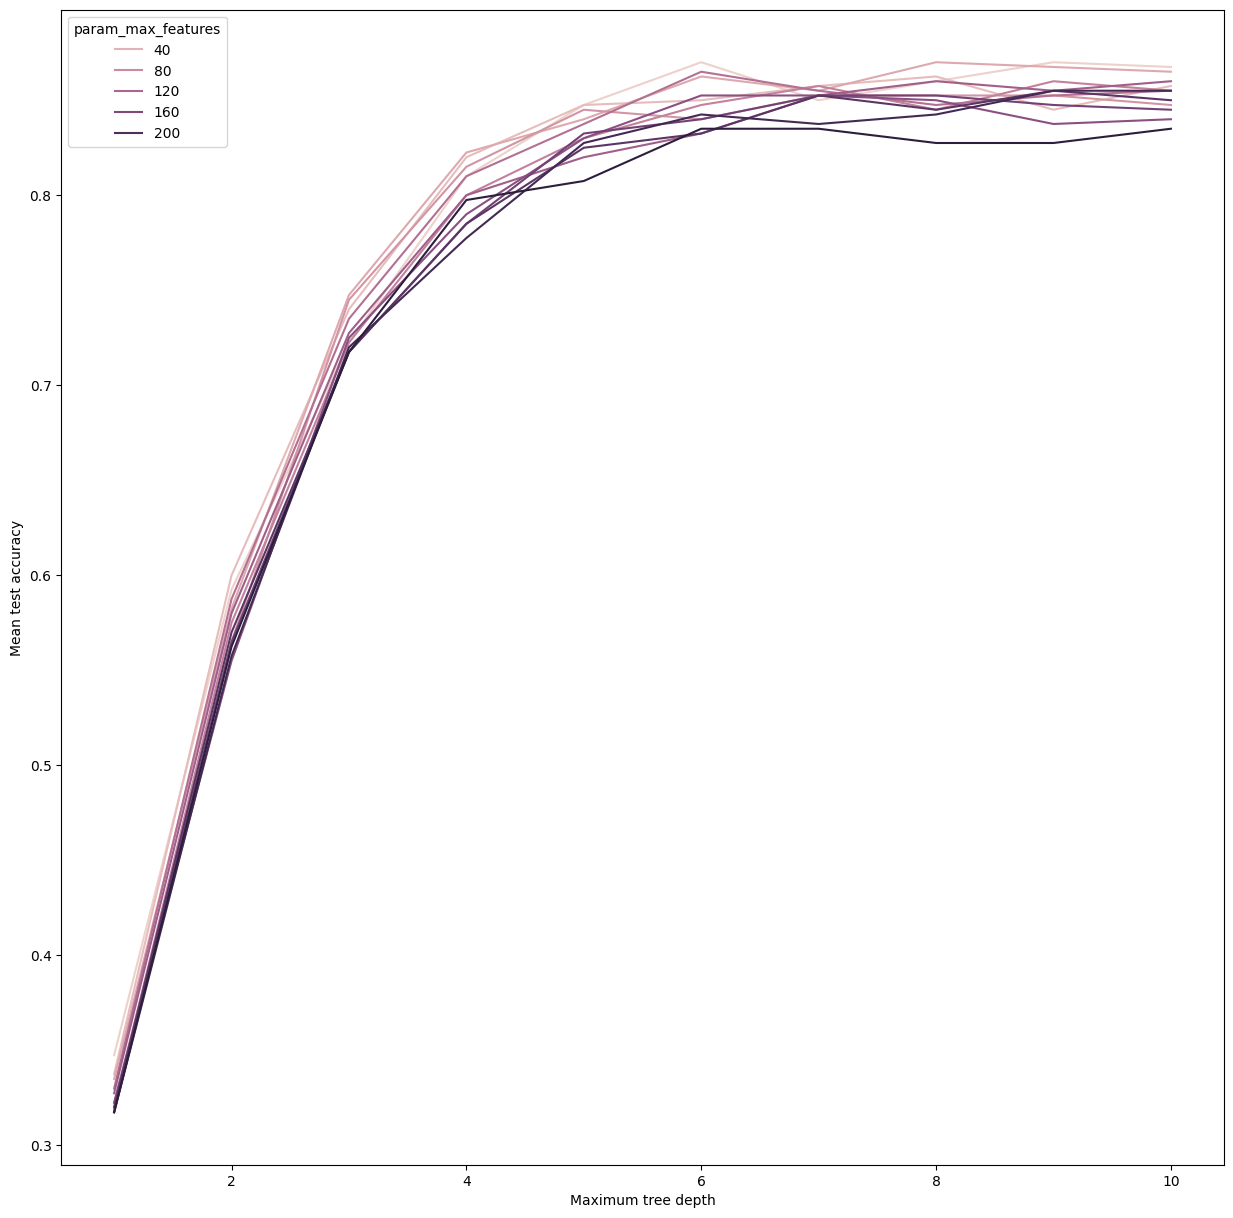

In [18]:
df_100_estimators = df[df['param_n_estimators']==100]

fig, ax = plt.subplots(figsize=(15,15))

_ = sns.lineplot(data=df_100_estimators, x='param_max_depth', y='mean_test_score', hue='param_max_features', ax=ax)
# _ = sns.lineplot(data=df_100_estimators, x='param_max_depth', y='mean_test_score', hue='param_min_samples_leaf', ax=ax)
ax.set_xlabel('Maximum tree depth')
ax.set_ylabel('Mean test accuracy')

Text(0, 0.5, 'Mean test accuracy')

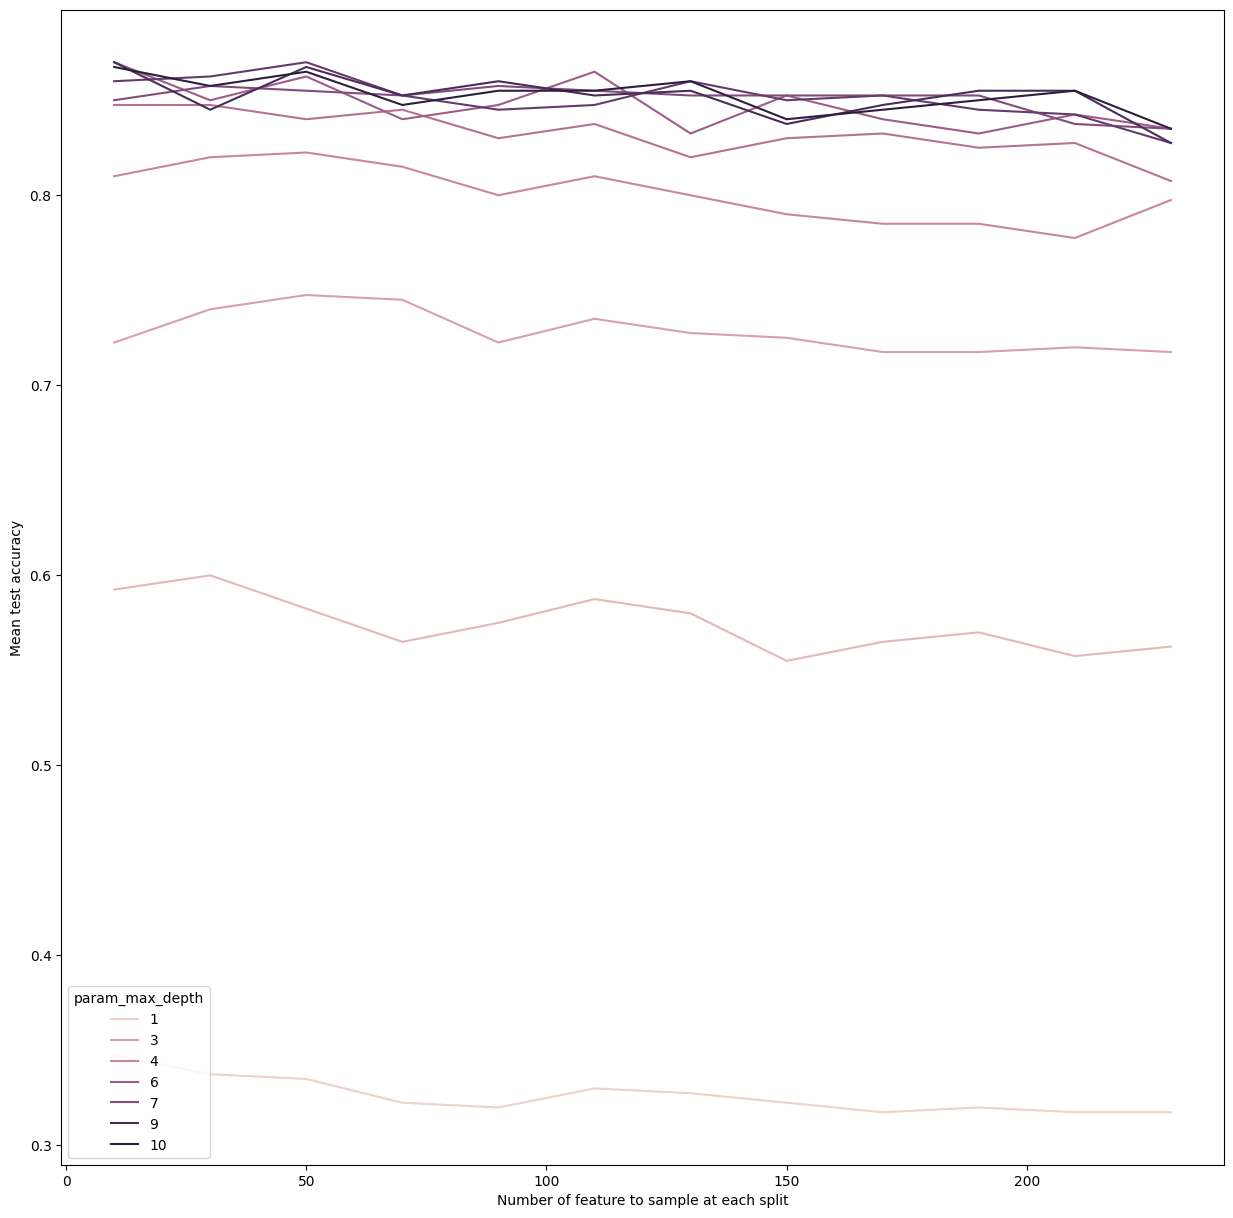

In [19]:
fig, ax = plt.subplots(figsize=(15,15))

_ = sns.lineplot(data=df_100_estimators, x='param_max_features', y='mean_test_score', hue='param_max_depth', ax=ax)
ax.set_xlabel('Number of feature to sample at each split')
ax.set_ylabel('Mean test accuracy')

Text(0, 0.5, 'Mean test accuracy')

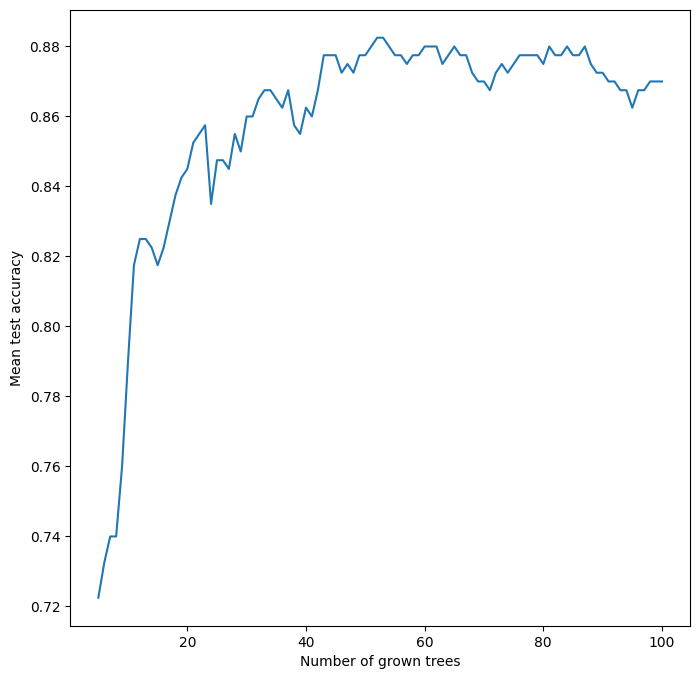

In [21]:
#We use the best to vizuallize the accuracy as a function of the grown trees
#What are they?
df_num_estimators = df[((df['param_max_features']==50) & (df['param_max_depth']==8))]

fig, ax = plt.subplots(figsize=(8,8))

_ = sns.lineplot(data=df_num_estimators, x='param_n_estimators', y='mean_test_score', ax=ax)
ax.set_xlabel('Number of grown trees')
ax.set_ylabel('Mean test accuracy')

> a) How should you set the parameters to run bagging?

<span style="color:yellow"> Set bootstrap = True, and set max_samples to some integer.

> b) How should you set the parameters to run CART?

<span style="color:yellow"> Set n_estimators to 1?

> c) Plot variable importances and a variable correlation matrix. How do you interpret
these?

In [26]:
X[:, 196]

array([ 1.   ,  0.639, -1.   , -1.   ,  0.355,  0.084, -0.952, -1.   ,
       -1.   , -1.   , -1.   ,  1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   ,  1.   ,  0.883, -1.   , -1.   , -0.062, -1.   , -1.   ,
        0.873, -1.   , -1.   , -1.   , -1.   , -1.   ,  0.161,  0.695,
       -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,  0.96 ,  0.227,
        0.225,  1.   , -1.   , -1.   , -1.   ,  0.308, -1.   , -1.   ,
       -0.816,  1.   ,  0.425, -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   ,  0.018,  0.919,  0.894, -1.   ,  0.079, -0.705,  1.   ,
       -1.   ,  1.   ,  0.975, -0.331,  1.   ,  0.01 , -1.   ,  0.854,
        0.589,  0.504,  1.   ,  1.   ,  0.556, -0.97 , -1.   ,  0.968,
       -0.928,  1.   , -1.   ,  1.   , -1.   ,  0.749, -1.   ,  0.99 ,
       -1.   ,  1.   , -1.   ,  1.   , -1.   , -1.   , -1.   ,  0.535,
        1.   ,  1.   , -1.   ,  1.   ,  0.122,  0.21 ,  0.946, -1.   ,
       -0.399, -1.   , -0.501, -1.   ,  0.87 , -1.   ,  0.983,  0.368,
      

In [24]:
## Look at the best estimator and the importance of the features
best_rf = rf_grid.best_estimator_

values = sorted(zip(range(0,P), rf_grid.best_estimator_.feature_importances_), key=lambda x: x[1] * -1)

# See which features are deemed most important by the classifier
# Only gonna look at the 10 most important features out of 256
print(tabulate(values[0:10], ["name", "score"][0:10], tablefmt="plain"))
# print ('Random Forest OOB error rate: {}'.format(1 - rf_grid.best_estimator_.oob_score_))

  name      score
   212  0.020637
   196  0.0199502
   151  0.0189748
   104  0.01778
    75  0.0169129
   119  0.0166181
   135  0.0161851
   120  0.0161284
   211  0.0143521
    37  0.014211
